### Image对象转cv2(np.adarray)

```python
img = Image.open(path)
img_array = np.array(img)
```

### cv2(np.adarray)转Image对象

```python
img = cv2.imread(path)
img_Image = Image.fromarray(np.uint8(img))
```


In [ ]:
import cv2
import matplotlib.pyplot as plt

# cv2读取默认是BGR，需要转换才能正确显示
img = cv2.imread("img/obama.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


In [ ]:
import numpy as np
from PIL import Image

fimg = np.array(Image.open("img/obama.jpg"), np.float32)
img = fimg.astype(np.uint8)
print(fimg.dtype, img.dtype)

plt.imshow(img)


imshow内部的参数类型可以分为两种

- 当输入矩阵是uint8类型的时候，此时imshow显示图像的时候，会认为输入矩阵的范围在`0-255`之间
- 当输入矩阵是double类型的时候，那么imshow会认为输入矩阵的范围在`0-1`

因此, 需要使用astype将float32转换为uint8，否则会出现一片白色([python中opencv imshow函数显示一片白色原因](https://blog.csdn.net/lyl771857509/article/details/80143134))。如果使用int8，会出现另一个问题：

```
resize.cpp:3787: error: (-215:Assertion failed) func != 0 in function 'cv::hal::resize'
```

In [ ]:
from utils import utils

fimg2 = utils.letterbox_image(img, [600, 800])
img2 = fimg2.astype(np.uint8)
plt.imshow(img2)

In [ ]:
img3 = utils.preprocess_input(fimg)
plt.imshow(img3)

Loading weights into state dict...
Finished!
faces detected: 42


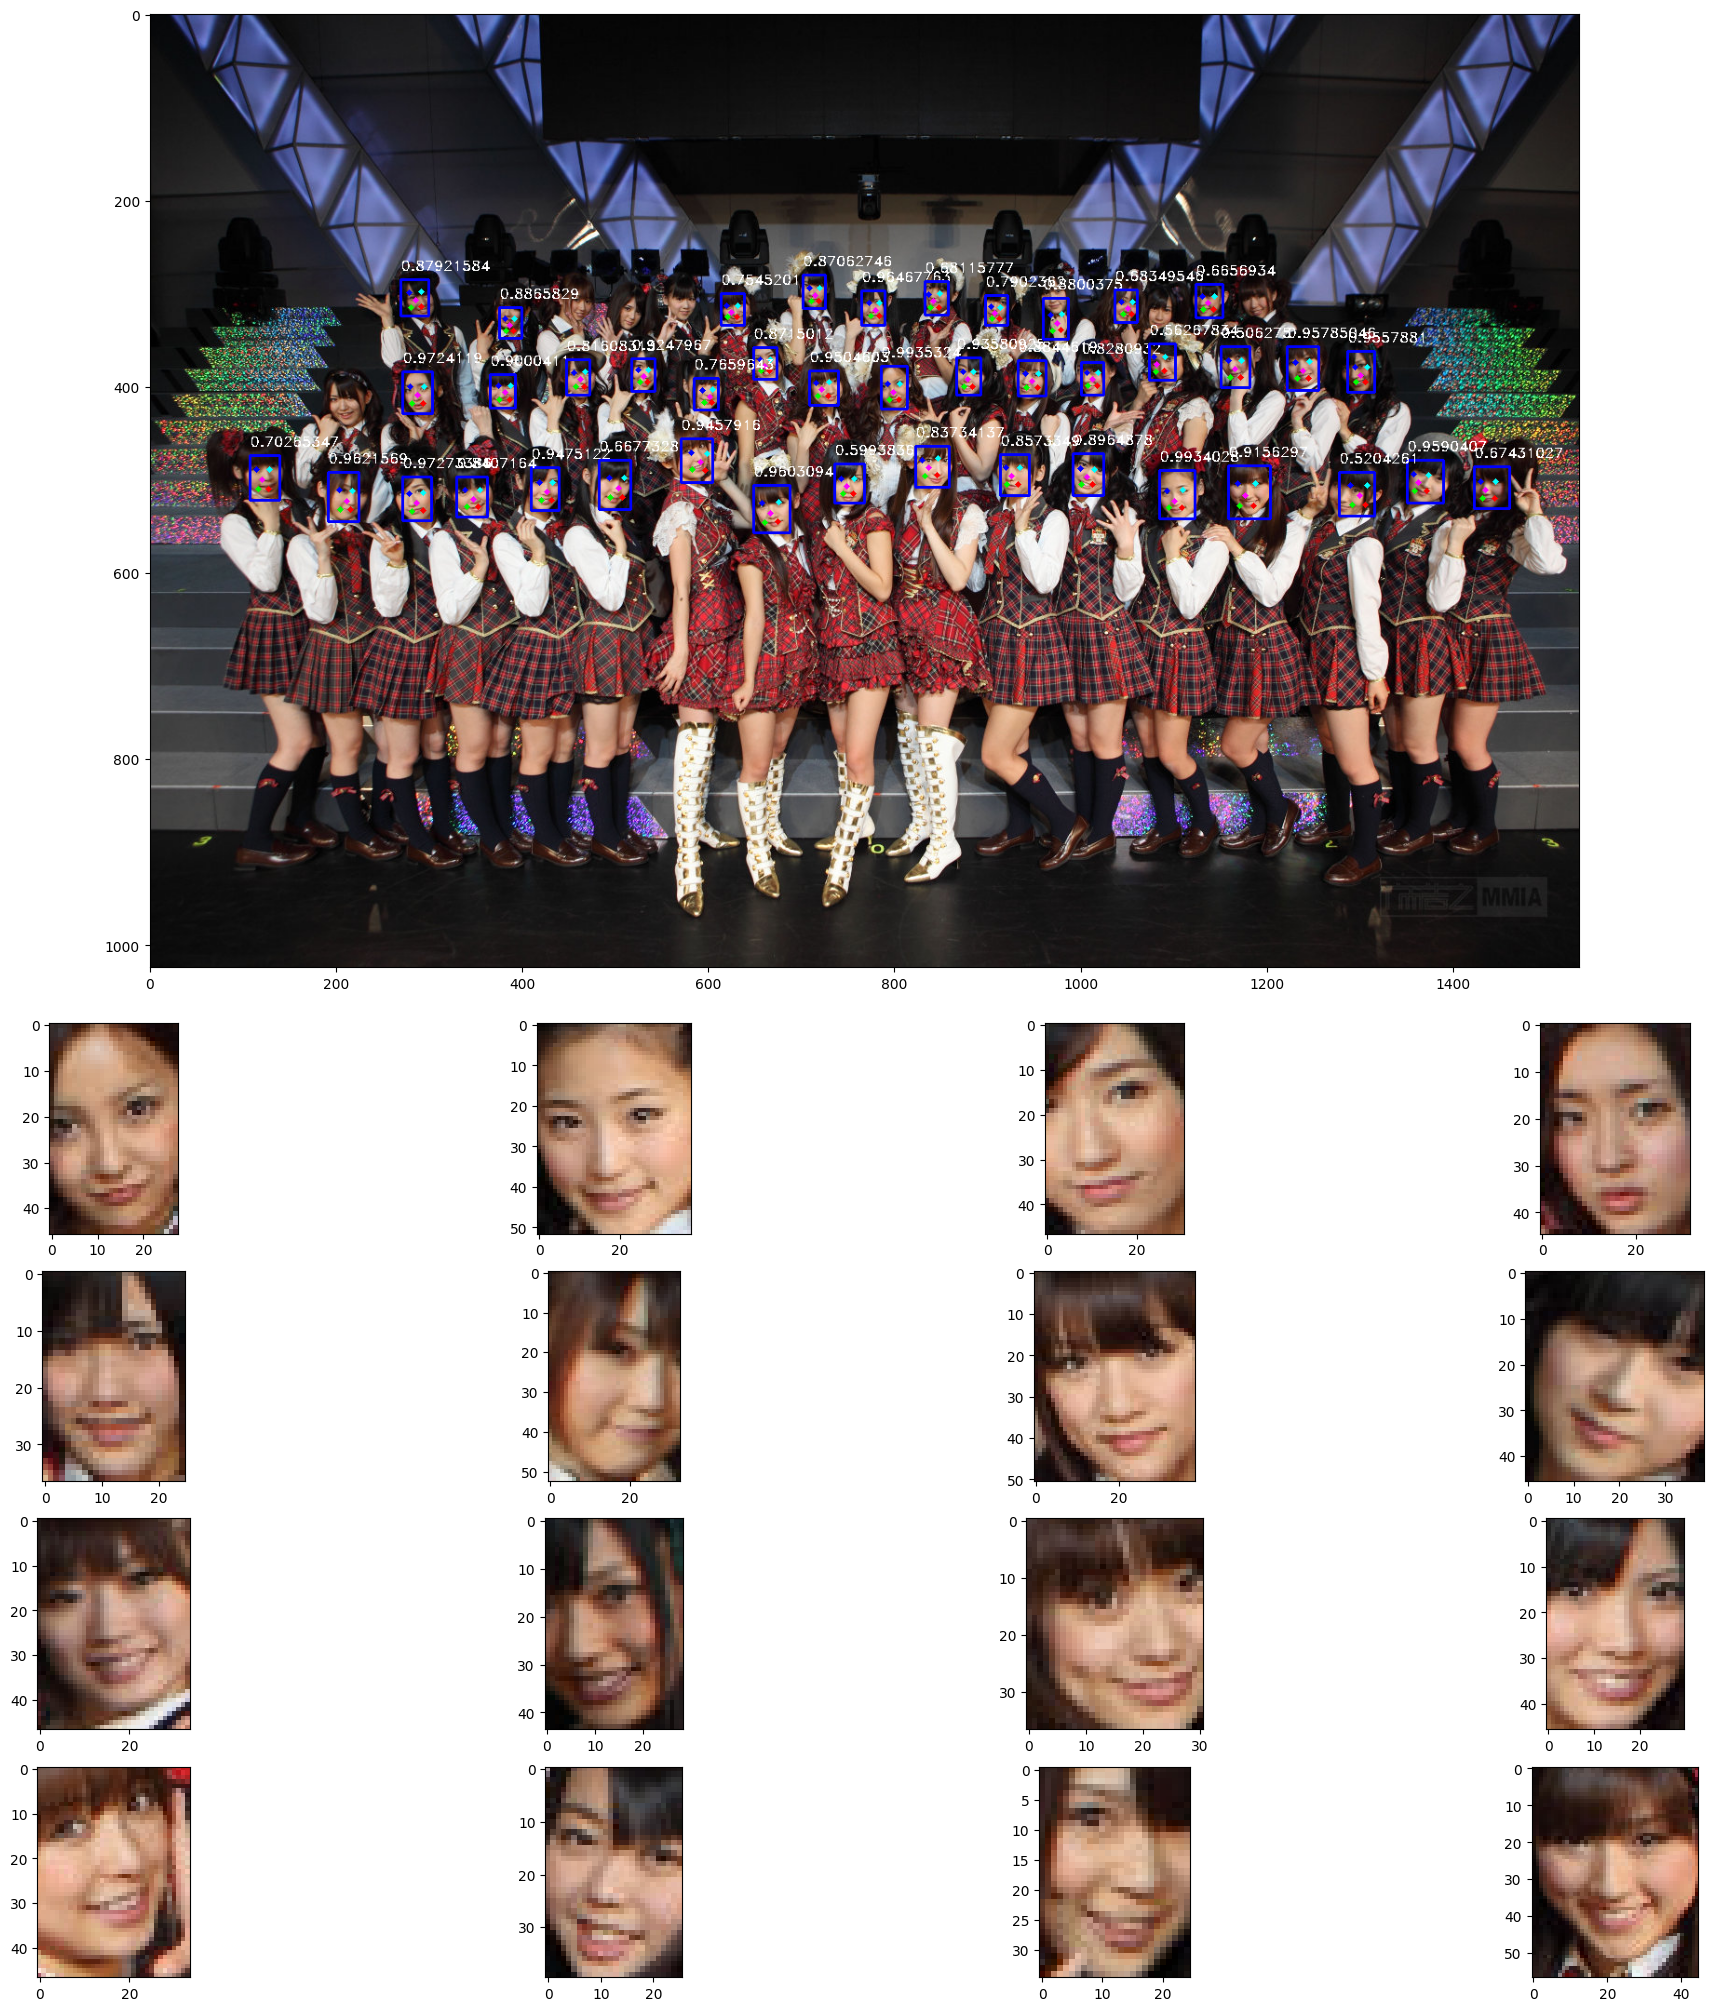

In [59]:
import cv2
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from retinaface import Retinaface

retinaface = Retinaface(cuda=torch.cuda.is_available())

img = np.array(Image.open("img/akb48.jpg"), np.float32)
result = retinaface.face_detect(img)
print(f'faces detected: {result.shape[0]}')
crop_imgs = []
for i in range(result.shape[0]):
    # print(result[i][0:2], result[i][2:4])
    # print(result[i])
    
    b = np.array(result[i], np.int32)
    cx = b[0]
    cy = b[1] - 10
    conf = str(result[i][4])
    crop_imgs.append(np.array(img)[int(b[1]):int(b[3]), int(b[0]):int(b[2])])
    cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
    cv2.putText(img, conf, (cx, cy), cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))
    cv2.circle(img, (b[5], b[6]), 1, (0, 0, 255), 4)
    cv2.circle(img, (b[7], b[8]), 1, (0, 255, 255), 4)
    cv2.circle(img, (b[9], b[10]), 1, (255, 0, 255), 4)
    cv2.circle(img, (b[11], b[12]), 1, (0, 255, 0), 4)
    cv2.circle(img, (b[13], b[14]), 1, (255, 0, 0), 4)

img = img.astype(np.uint8)

nrow = 4
ncol = 8
fig = plt.figure(constrained_layout=True, figsize=(20, 20))
subfig = fig.subfigures(2, 1)
pl1 = subfig[0].subplots(1, 1)
pl1.imshow(img)

axs = subfig[1].subplots(nrow, ncol)
# fig = plt.figure(figsize=[10.0, 10.0])
# fig.add_subplot(i,2,1)
# plt.imshow(img)

for i, im in enumerate(crop_imgs):
    if (i < nrow * ncol):
        axs[i // ncol, i % ncol].imshow(im.astype(np.uint8))
    # plt.imshow(im.astype(np.uint8))

plt.show()